In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [ ]:
iterations = [1, 2, 3, 4, 5, 6]
datasets = ['Shuttle', 'Covertype', 'KDD', 'Darknet']

metrics = {
    "F2": {
        "Shuttle": [0.9694, 0.9297, 0.3524, 0.9515, 0.1906, 0.8431],
        "Covertype": [0.4718, 0.4814, 0.2802, 0.5184, 0.2714, 0.3959],
        "KDD": [0.9573, 0.9539, 0.9443, 0.9512, 0.7167, 0.9501],
        "Darknet": [0.8501, 0.8460, 0.5732, 0.8755, 0.3119, 0.8603],
    },
    "MCC": {
        "Shuttle": [0.9170, 0.7963, 0.1331, 0.8673, 0.0381, 0.4495],
        "Covertype": [0.1506, 0.1630, 0.0009, 0.2114, 0.0048, 0.0602],
        "KDD": [0.3463, 0.2695, 0.0167, 0.1373, -0.0178, 0.1473],
        "Darknet": [0.2384, 0.2680, 0.0998, 0.4421, 0.0449, 0.2846],
    },
    "Macro Average Precision": {
        "Shuttle": [0.5686, 0.4900, 0.2257, 0.5147, 0.0678, 0.3845],
        "Covertype": [0.2434, 0.2649, 0.1300, 0.2899, 0.0878, 0.1538],
        "KDD": [0.1046, 0.1176, 0.0461, 0.0616, 0.0363, 0.0836],
        "Darknet": [0.2611, 0.1839, 0.1158, 0.3138, 0.0626, 0.2487],
    },
    "Weighted Average Precision": {
        "Shuttle": [0.9690, 0.9242, 0.4671, 0.9524, 0.2820, 0.8000],
        "Covertype": [0.4771, 0.4395, 0.2873, 0.4554, 0.2482, 0.3496],
        "KDD": [0.9364, 0.9344, 0.9127, 0.9219, 0.7273, 0.9235],
        "Darknet": [0.7818, 0.7833, 0.5972, 0.8364, 0.4574, 0.7902],
    },
    "Macro Average Recall (Balanced Accuracy)": {
        "Shuttle": [0.5501, 0.4227, 0.2220, 0.4601, 0.1432, 0.3525],
        "Covertype": [0.1912, 0.2042, 0.1358, 0.2265, 0.1491, 0.1563],
        "KDD": [0.0848, 0.0736, 0.0515, 0.0648, 0.0452, 0.0605],
        "Darknet": [0.2476, 0.1725, 0.1292, 0.2582, 0.1119, 0.2377],
    },
    "Weighted Average Recall (Accuracy)": {
        "Shuttle": [0.9699, 0.9338, 0.3784, 0.9538, 0.2246, 0.8649],
        "Covertype": [0.5338, 0.5393, 0.3213, 0.5685, 0.2986, 0.4712],
        "KDD": [0.9640, 0.9609, 0.9527, 0.9590, 0.7148, 0.9581],
        "Darknet": [0.8731, 0.8656, 0.5815, 0.8910, 0.3153, 0.8814],
    },
    "Macro Average F1 Score": {
        "Shuttle": [0.5289, 0.4400, 0.1610, 0.4701, 0.0508, 0.3545],
        "Covertype": [0.1617, 0.1770, 0.0804, 0.2038, 0.0908, 0.1146],
        "KDD": [0.0851, 0.0763, 0.0475, 0.0623, 0.0359, 0.0625],
        "Darknet": [0.2354, 0.1720, 0.1001, 0.2638, 0.0487, 0.2350],
    },
    "Weighted Average F1 Score": {
        "Shuttle": [0.9688, 0.9251, 0.3385, 0.9494, 0.1745, 0.8165],
        "Covertype": [0.4129, 0.4272, 0.2462, 0.4695, 0.2524, 0.3286],
        "KDD": [0.9476, 0.9437, 0.9322, 0.9399, 0.7201, 0.9384],
        "Darknet": [0.8186, 0.8195, 0.5745, 0.8550, 0.3337, 0.8314],
    }
}

In [ ]:
# Comparison baseline values for XGBoost and eLCS
comparison_values = {
    "F2": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8692, "KDD": 0.9998, "Darknet": 0.9997},
        "eLCS": {"Shuttle": 0.8163, "Covertype": 0.6722, "KDD": 0.9888, "Darknet": 0.9451},
    },
    "MCC": {
        "XGBoost": {"Shuttle": 0.9993, "Covertype": 0.7895, "KDD": 0.9980, "Darknet": 0.9991},
        "eLCS": {"Shuttle": 0.5102, "Covertype": 0.4706, "KDD": 0.8760, "Darknet": 0.8045},
    },
    "Macro Average Precision": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8839, "KDD": 0.8090, "Darknet": 0.9948},
        "eLCS": {"Shuttle": 0.2885, "Covertype": 0.4571, "KDD": 0.2967, "Darknet": 0.6752},
    },
    "Weighted Average Precision": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8697, "KDD": 0.9998, "Darknet": 0.9997},
        "eLCS": {"Shuttle": 0.7433, "Covertype": 0.6652, "KDD": 0.9864, "Darknet": 0.9440},
    },
    "Macro Average Recall (Balanced Accuracy)": {
        "XGBoost": {"Shuttle": 0.9243, "Covertype": 0.8319, "KDD": 0.7351, "Darknet": 0.9890},
        "eLCS": {"Shuttle": 0.2866, "Covertype": 0.3532, "KDD": 0.2182, "Darknet": 0.4195},
    },
    "Weighted Average Recall (Accuracy)": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8696, "KDD": 0.9998, "Darknet": 0.9997},
        "eLCS": {"Shuttle": 0.8451, "Covertype": 0.6833, "KDD": 0.9898, "Darknet": 0.9500},
    },
    "Macro Average F1 Score": {
        "XGBoost": {"Shuttle": 0.9501, "Covertype": 0.8539, "KDD": 0.7628, "Darknet": 0.9918},
        "eLCS": {"Shuttle": 0.2768, "Covertype": 0.3594, "KDD": 0.2357, "Darknet": 0.4494},
    },
    "Weighted Average F1 Score": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8690, "KDD": 0.9998, "Darknet": 0.9997},
        "eLCS": {"Shuttle": 0.7780, "Covertype": 0.6600, "KDD": 0.9875, "Darknet": 0.9390},
    }
}

In [4]:
# Define colors for datasets
dataset_colors = {
    "Shuttle": "b",
    "Covertype": "g",
    "KDD": "r",
    "Darknet": "gray",
}

# Helper function to adjust brightness of a color
def adjust_brightness(color, factor):
    rgb = mcolors.to_rgb(color)
    return tuple(min(max(c * factor, 0), 1) for c in rgb)

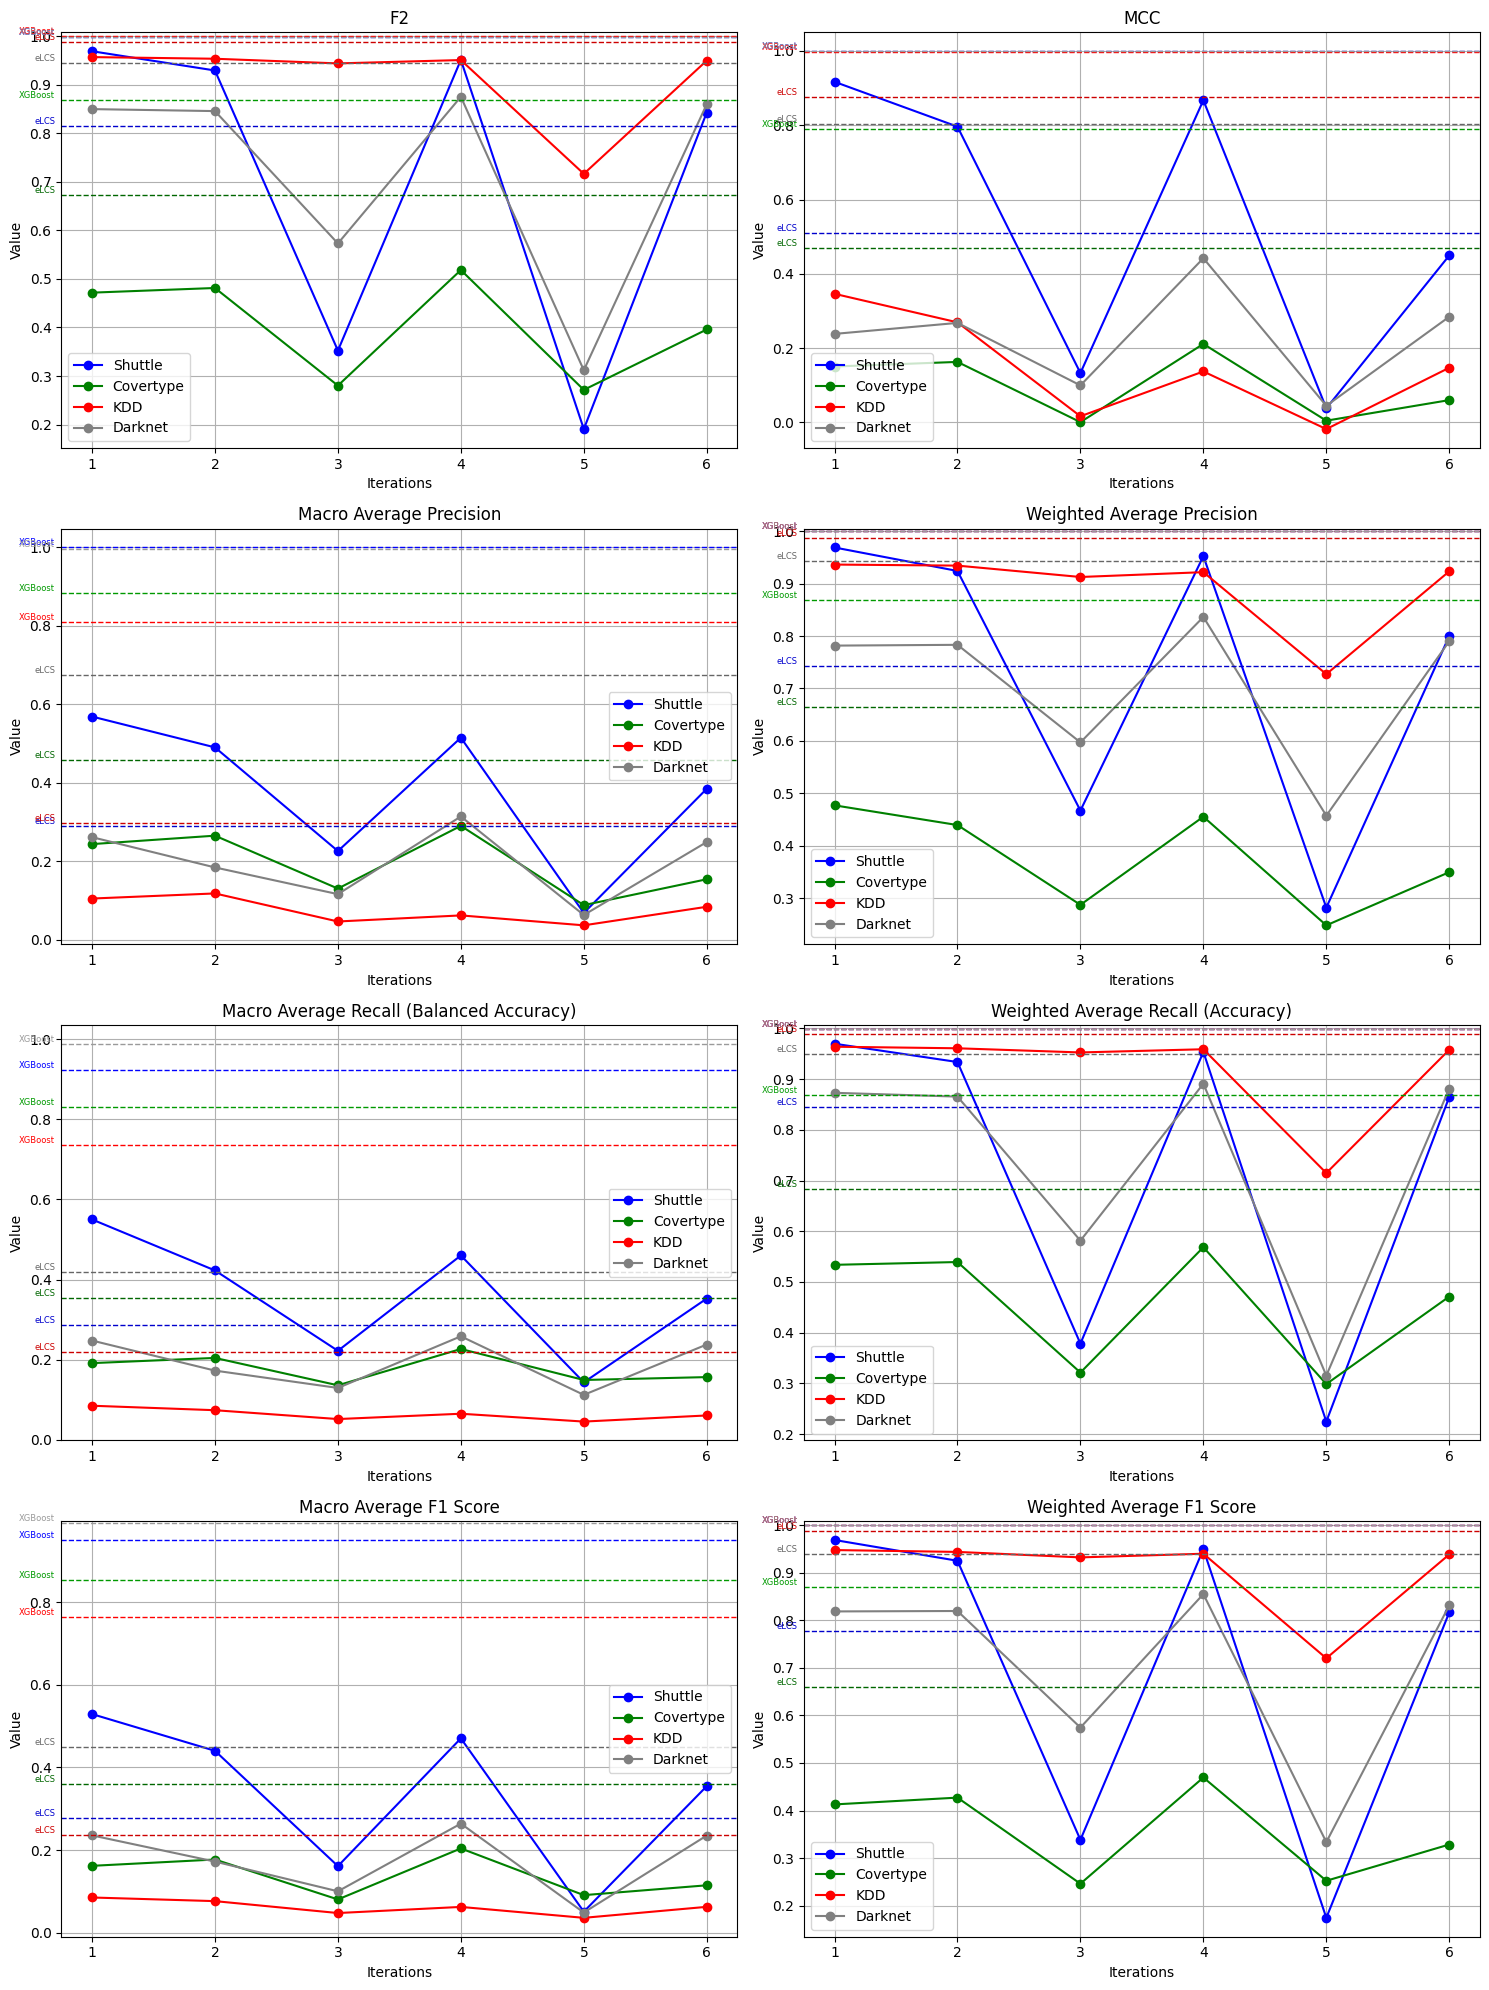

In [5]:
# List of metrics to plot
metric_names = [
    #"ROC-AUC", "PR-AUC",
    "F2", "MCC", 
    "Macro Average Precision", "Weighted Average Precision", 
    "Macro Average Recall (Balanced Accuracy)", "Weighted Average Recall (Accuracy)", 
    "Macro Average F1 Score", "Weighted Average F1 Score"
]

# Set up the figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Iterate through the metrics and plot each one
for i, metric in enumerate(metric_names):
    if metric in metrics:
        ax = axes[i]
        for dataset in datasets:
            # Plot the dataset's line
            ax.plot(iterations, metrics[metric][dataset], label=dataset, marker='o', color=dataset_colors[dataset])
        
    # Add horizontal dashed lines for XGBoost and eLCS
    if metric in comparison_values:
        xgboost_values = comparison_values[metric].get("XGBoost", {})
        elcs_values = comparison_values[metric].get("eLCS", {})
            
        for dataset in datasets:
            # Dashed line for XGBoost
            if dataset in xgboost_values:
                xgboost_value = xgboost_values[dataset]
                dashed_color = adjust_brightness(dataset_colors[dataset], 1.2)  # Slightly brighter
                ax.axhline(y=xgboost_value, color=dashed_color, linestyle='--', linewidth=1)
                ax.text(iterations[0] - 0.3, xgboost_value, 'XGBoost', 
                        color=dashed_color, fontsize=6, va='bottom', ha='right')

            # Dashed line for eLCS
            if dataset in elcs_values:
                elcs_value = elcs_values[dataset]
                dashed_color = adjust_brightness(dataset_colors[dataset], 0.8)  # Slightly darker
                ax.axhline(y=elcs_value, color=dashed_color, linestyle='--', linewidth=1)
                ax.text(iterations[0] - 0.3, elcs_value, 'eLCS', 
                        color=dashed_color, fontsize=6, va='bottom', ha='right')

        ax.set_title(metric)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Value')
        ax.legend()
        ax.grid(True)
    else:
        # If no data for a metric, skip its subplot
        axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()